In [1]:
#
#imports
#

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
import sklearn

In [2]:
#
#defining useful functions
#

def greyscale_from_array(im, brightening_factor=1):
    #stack the three channels side by side
    rgb = np.hstack((im[::,::,0:1:],im[::,::,1:2:],im[::,::,2:3:]))

    #change each list of one integer to just that integer
    rgb_fixed = np.zeros((rgb.shape[0], rgb.shape[1]))
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            rgb_fixed[i][j] = rgb[i][j][0]*brightening_factor

    #return the greyscale image
    return rgb_fixed

def load_images_to_dict(key="stack", folder="train", height=24, width=36):
    #for switching between "train", "test", and "valid" folders
    path = (folder + "/" + folder)

    #makes a dictionary mapping species to all the files in that folder
    directories = {}
    for species_file in os.listdir(path):
        directories[species_file] = os.listdir(path  + "/" + species_file)

    #makes a dictionary mapping species to arrays for each image in that folder
    images = {}
    for directory in directories.keys():
        images[directory] = []
        for file in os.listdir(path + "/" + directory): 
            if key == "stack":
                array = np.array(Image.open(path + "/" + directory + "/" + file).resize((height,width)))
                images[directory].append(np.hstack((array[::,::,0],array[::,::,1],array[::,::,2])))
            elif key == "b/g":
                array = np.array(Image.open(path + "/" + directory + "/" + file).resize((height,width)))
                images[directory].append(np.hstack((array[::,::,1],array[::,::,2])))
            else:
                images[directory].append(np.array(Image.open(path + "/" + directory + "/" + file).resize((height,width)))[::,::,key])

    #return that dictionary
    return images

def build_X_y_from_dict(image_dict):
    X = []
    y = []
    
    i=0
    for key, value in image_dict.items():
        for image in value:
            X.append(image)
            y.append(i)
        i += 1
    
    y = np.array(y)
    X = np.array(X)
    X = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]))

    return X, y

In [26]:
#
#Load the data into numpy arrays
#

train_images = load_images_to_dict(key="stack")
X_train, y_train = build_X_y_from_dict(train_images)
test_images = load_images_to_dict(key="stack", folder="test")
X_test, y_test = build_X_y_from_dict(test_images)

In [4]:
#
#train and score the data
#

scores = []
for k in range(1, 100):
    neigh = KNeighborsClassifier(k).fit(X_train, y_train)
    scores.append(neigh.score(X_test, y_test))

#X_test, X_train = normalize_Xtest_Xtrain(X_test, X_train)

#clf = LogisticRegression(random_state=0, max_iter=100).fit(X_train, y_train)
#score = clf.score(X_test, y_test)
#print(score)
#scores.append(score)

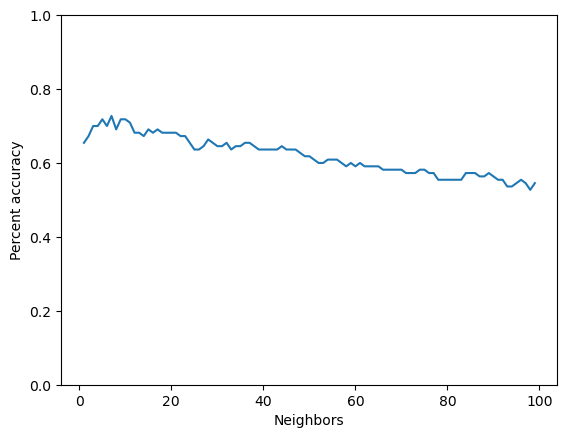

0.7272727272727273


In [13]:
plt.plot(range(1, 100), scores)
plt.xlabel("Neighbors")
plt.ylabel("Percent accuracy")
plt.ylim(0, 1)
plt.savefig("Neighbors Vs. Acurracy.png")
plt.show()
print(max(scores))

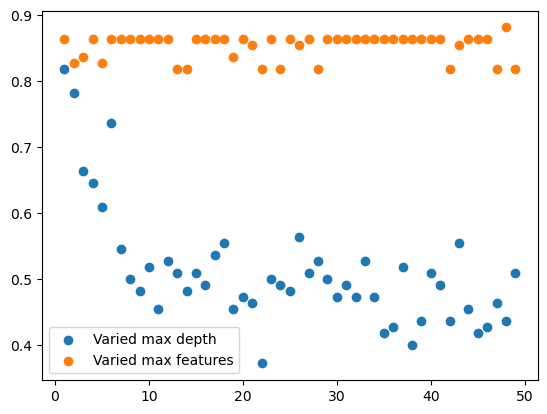

In [25]:
scores = []
for i in range(1, 50):
    clf = tree.DecisionTreeClassifier(criterion="gini", max_features=3, max_depth = i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = sklearn.metrics.zero_one_loss(y_test, y_pred, normalize=True)
    scores.append(score)
scores_2 = []
for j in range(1, 50):
    clf = tree.DecisionTreeClassifier(criterion="gini", max_features=j, max_depth = 1)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = sklearn.metrics.zero_one_loss(y_test, y_pred, normalize=True)
    scores_2.append(score)
plt.figure()
plt.scatter(range(1, 50), scores, label="Varied max depth")
plt.scatter(range(1, 50), scores_2, label="Varied max features")
plt.legend()
plt.savefig("Max depth, max features for decision trees")